In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [4]:
len(X_test)

10000

In [5]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

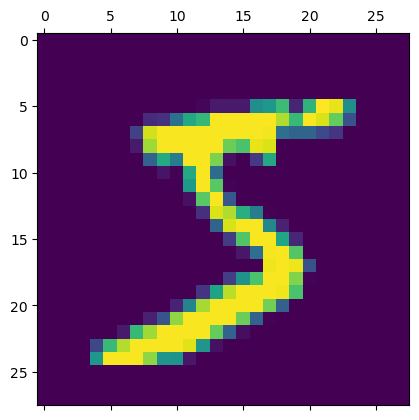

In [6]:
plt.matshow(X_train[0])

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_train_flattened


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
# What happens when reshape dimensions don't match?
# Original X_train has 60000 * 28 * 28 = 47,040,000 elements
# But trying to reshape to (60000, 27*28) = (60000, 756) = 45,360,000 elements

try:
    X_train_wrong = X_train.reshape(len(X_train), 27*28)
except ValueError as e:
    print(f'Error: {e}')

Error: cannot reshape array of size 47040000 into shape (60000,756)


In [10]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5


/opt/anaconda3/envs/imdb/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 246us/step - accuracy: 0.8779 - loss: 0.4658
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.9148 - loss: 0.3036
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.9204 - loss: 0.2836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.9236 - loss: 0.2731
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.9254 - loss: 0.2669


In [12]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.9252 - loss: 0.2675


[0.26753801107406616, 0.9251999855041504]

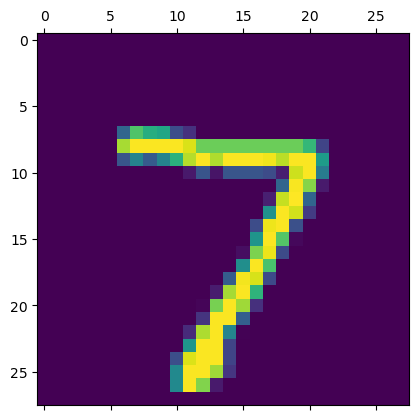

In [13]:
plt.matshow(X_test[0])

In [14]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step


array([1.6938163e-02, 3.6049929e-07, 6.2357038e-02, 9.3924206e-01,
       2.4586248e-03, 6.9675490e-02, 1.1496650e-06, 9.9975377e-01,
       6.5106116e-02, 5.8701855e-01], dtype=float32)

In [16]:
np.argmax(y_predicted[0])

np.int64(7)

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

BUILDING CONFUSION MATRIX

In [19]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   6,    8,  936,   11,    8,    1,   12,   11,   36,    3],
       [   4,    0,   26,  916,    0,   19,    2,   13,   22,    8],
       [   2,    1,    9,    1,  911,    0,    9,    4,   10,   35],
       [  12,    3,    4,   37,   10,  759,   17,    9,   34,    7],
       [  13,    3,    9,    1,    7,    8,  912,    2,    3,    0],
       [   1,    6,   25,    3,    8,    0,    0,  957,    2,   26],
       [   9,    8,    8,   18,    9,   19,   10,   13,  874,    6],
       [  10,    7,    2,   10,   29,    5,    0,   30,    7,  909]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

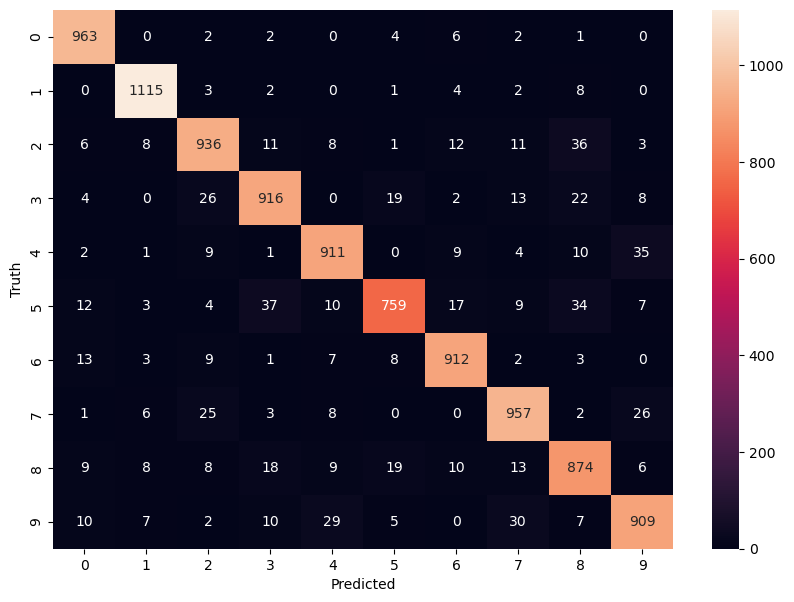

In [23]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


